## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### Nombre

Alberto Falconi

### Fecha

30/05/2025

### 📍 Ciudades:

- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):

- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---

### 🎯 Objetivos del estudiante

- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 _Sugerencia:_ Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.


		📊Grado de cada nodo
🎚️ Ibarra: entrada = 0, salida = 1
🎚️ Quito: entrada = 1, salida = 3
🎚️ Santo Domingo: entrada = 1, salida = 2
🎚️ Manta: entrada = 2, salida = 1
🎚️ Portoviejo: entrada = 1, salida = 1
🎚️ Guayaquil: entrada = 2, salida = 2
🎚️ Cuenca: entrada = 2, salida = 1
🎚️ Loja: entrada = 2, salida = 0

		🧮Listado de pesos de todas las aristas:
🏙️ Ibarra → Quito: peso = 10
🏙️ Quito → Santo Domingo: peso = 15
🏙️ Quito → Manta: peso = 30
🏙️ Quito → Cuenca: peso = 35
🏙️ Santo Domingo → Manta: peso = 12
🏙️ Santo Domingo → Guayaquil: peso = 22
🏙️ Manta → Portoviejo: peso = 5
🏙️ Portoviejo → Guayaquil: peso = 20
🏙️ Guayaquil → Cuenca: peso = 25
🏙️ Guayaquil → Loja: peso = 40
🏙️ Cuenca → Loja: peso = 18

		🖼️Dibujando el grafo...


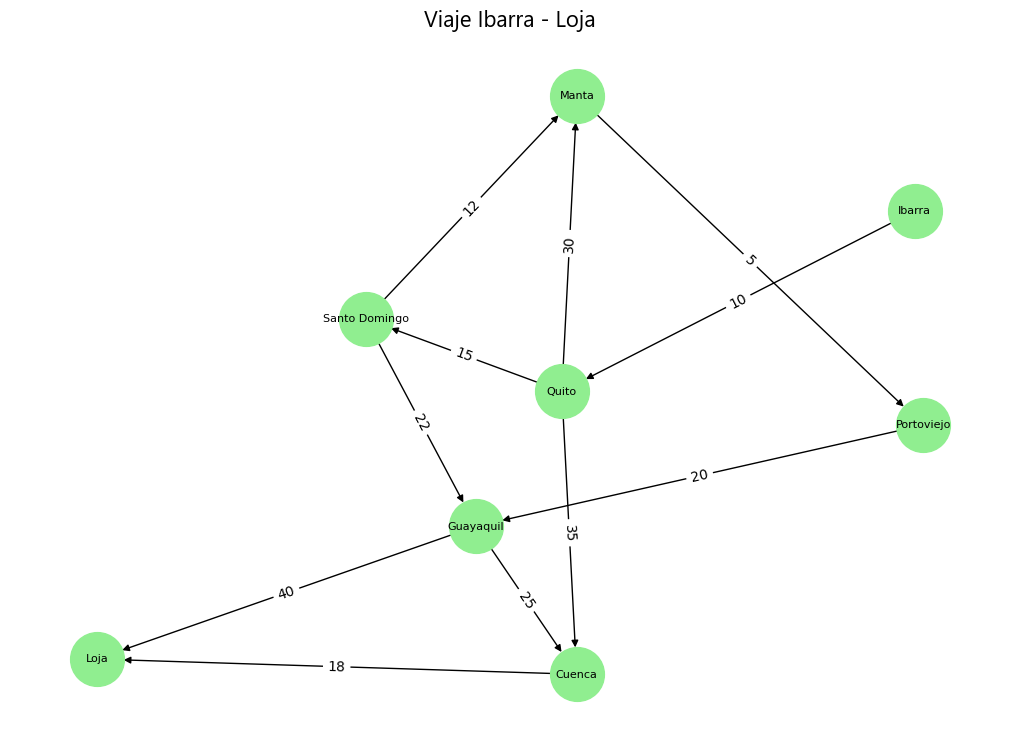


		🟡 Ruta más económica de Ibarra a Loja
Recorrido: ['Ibarra', 'Quito', 'Cuenca', 'Loja']
Costo total: $ 63

		🔵 Ruta más económica de Ibarra a Loja pasando por una ciudad costera
Camino más barato que pasa por ciudad costera: ['Ibarra', 'Quito', 'Santo Domingo', 'Guayaquil', 'Loja']
Costo total del viaje: $ 87


In [22]:
# Importamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

# Creamos el grafo dirigido
G = nx.DiGraph()

# Añadimos los nodos que representan las ciudades
ciudades = ['Ibarra','Quito','Santo Domingo','Manta','Portoviejo','Guayaquil','Cuenca','Loja']
G.add_nodes_from(ciudades)

# Añadimos las aristas junto con sus respectivos pesos
G.add_edge('Ibarra', 'Quito', weight=10)
G.add_edge('Quito', 'Santo Domingo', weight=15)
G.add_edge('Quito', 'Manta', weight=30)
G.add_edge('Santo Domingo', 'Manta', weight=12)
G.add_edge('Manta', 'Portoviejo', weight=5)
G.add_edge('Portoviejo', 'Guayaquil', weight=20)
G.add_edge('Guayaquil', 'Cuenca', weight=25)
G.add_edge('Cuenca', 'Loja', weight=18)
G.add_edge('Quito', 'Cuenca', weight=35)
G.add_edge('Santo Domingo', 'Guayaquil', weight=22)
G.add_edge('Guayaquil', 'Loja', weight=40)

# ====================================
# 📌 GRADO de cada nodo
# in_degree: entradas | out_degree: salidas
# ====================================
print("\t\t📊Grado de cada nodo")
for nodo in G.nodes:
    print(f"🎚️ {nodo}: entrada = {G.in_degree(nodo)}, salida = {G.out_degree(nodo)}")

# Definimos la posición de los nodos usando un layout automático
pos = nx.spring_layout(G, seed=42, k=1.5)

# 🔁 Iterar sobre todas las aristas y mostrar sus pesos
print("\n\t\t🧮Listado de pesos de todas las aristas:")
for u, v, datos in G.edges(data=True):
    print(f"🏙️ {u} → {v}: peso = {datos['weight']}")

# Dibujamos el grafo
print("\n\t\t🖼️Dibujando el grafo...")
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=8, arrows=True)

# Mostramos los pesos sobre las aristas
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Título del gráfico
plt.title("Viaje Ibarra - Loja", fontsize=16, fontweight='bold')
# Mostramos el grafo
plt.axis('off')
plt.show()

# ===================================================
# 🧠 Parte 1: Camino más barato sin restricciones
# ===================================================
print("\n\t\t🟡 Ruta más económica de Ibarra a Loja")
camino_normal = nx.dijkstra_path(G, source='Ibarra', target='Loja', weight='weight')
costo_normal = nx.dijkstra_path_length(G, source='Ibarra', target='Loja', weight='weight')
print("Recorrido:", camino_normal)
print("Costo total: $", costo_normal)

# ===================================================
# 🧠 Parte 2: Camino más barato pasando por ciudad costera
# ===================================================
print("\n\t\t🔵 Ruta más económica de Ibarra a Loja pasando por una ciudad costera")

ciudades_costas = ['Manta', 'Portoviejo', 'Guayaquil']
mejor_camino = None
mejor_costo = float('inf')

for ciudad_costa in ciudades_costas:
    if nx.has_path(G, 'Ibarra', ciudad_costa) and nx.has_path(G, ciudad_costa, 'Loja'):
        # Tramo 1: Ibarra → ciudad costera
        tramo1 = nx.dijkstra_path(G, 'Ibarra', ciudad_costa, weight='weight')
        costo1 = nx.dijkstra_path_length(G, 'Ibarra', ciudad_costa, weight='weight')

        # Tramo 2: ciudad costera → Loja
        tramo2 = nx.dijkstra_path(G, ciudad_costa, 'Loja', weight='weight')
        costo2 = nx.dijkstra_path_length(G, ciudad_costa, 'Loja', weight='weight')

        # Unimos caminos sin repetir ciudad intermedia
        camino_total = tramo1 + tramo2[1:]
        costo_total = costo1 + costo2

        # Comparamos
        if costo_total < mejor_costo:
            mejor_costo = costo_total
            mejor_camino = camino_total

# Mostrar resultado
if mejor_camino:
    print("Camino más barato que pasa por ciudad costera:", mejor_camino)
    print("Costo total del viaje: $", mejor_costo)
else:
    print("⚠️No se encontró un camino que pase por ciudad costera.")
# ===================================================

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                | Puntaje Máximo |
| -------------------------------------------------------------------------------- | -------------- |
| Creación correcta del grafo con nodos y aristas                                  | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                     | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                       | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera               | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                     | 10 puntos      |
| Claridad del código, comentarios y estilo                                        | 10 puntos      |
| **Total**                                                                        | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.
